# Notebook 03 - Data Cleaning

## Objectives
* Clean data
* Evaluate and process missing data

## Inputs
* outputs/datasets/collection/HousePricesRecords.csv

## Outputs
* Create Clean dataset:
    * all new datasets of cleaning will be stored in inputs/datasets/cleaning
* Split created dataset in to 3 parts:
    * Train
    * Validate
    * Test
* all new datasets (train, validate and test) will be stored in outputs/datasets/cleaned

## Change working directory
In This section we will get location of current directory and move one step up, to parent folder, so App will be accessing project folder.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("you have set a new current directory")

you have set a new current directory


Confirm new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/pecukevicius/DataspellProjects/heritage_houses_p5'

## Loading Dataset

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")
df.head()

,Unnamed: 0,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,0,856,854.0,3.0,No,706,GLQ,150,0.0,548,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,3,961,NaN,NaN,No,216,ALQ,540,NaN,642,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


Will make a copy of dataset, so later it can be compared with cleaned one

## Exploring Data

We will get all features that are missing data as a list

In [5]:
features_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
features_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

### Visualizing Missing Data

Visualize the missing data to better understand the pattern of missingness.

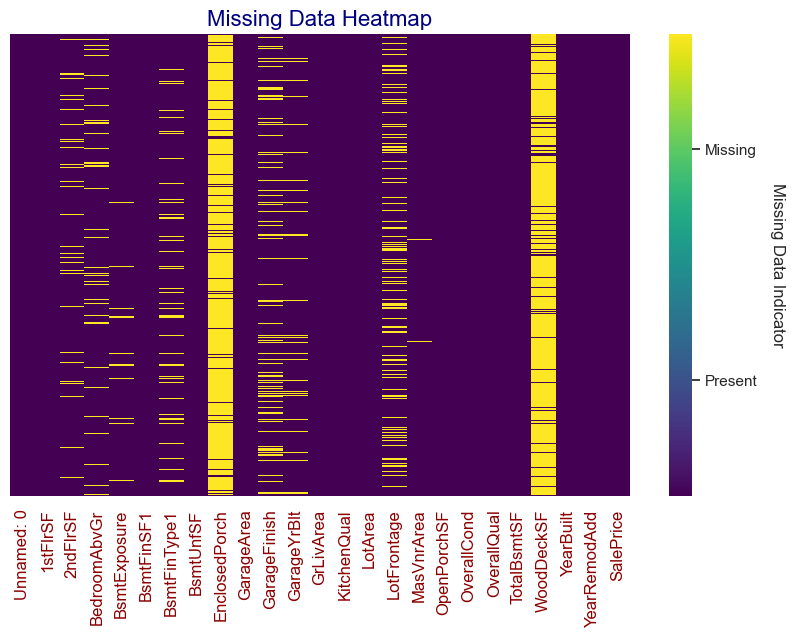

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background style
sns.set(style="white")

# Prepare the data for heatmap, converting True/False to integers for color mapping
heatmap_data = df.isnull().astype(int)

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
# Using `cbar=True` to show the color bar
ax = sns.heatmap(heatmap_data, yticklabels=False, cbar=True, cmap='viridis',
                 cbar_kws={'label': 'Missing Data Indicator'})

# Customize the plot with titles and labels as needed
plt.title('Missing Data Heatmap', fontsize=16, color='navy')
plt.xticks(fontsize=12, color='darkred')  # Set x-tick colors to dark red
plt.yticks(fontsize=12, color='darkred')  # Set y-tick colors to dark red

# Set color bar label and style
cbar = ax.collections[0].colorbar
cbar.set_label('Missing Data Indicator', rotation=270, labelpad=20)
cbar.set_ticks([0.25, 0.75])  # Setting tick positions
cbar.set_ticklabels(['Present', 'Missing'])  # Setting tick labels

# Show the plot
plt.show()


We will generate a profiling report for features with missing data, which will assist us in selecting the most effective method for data cleaning.

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df=df[features_with_missing_data], minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## All Data Cleaning

All Data cleaning with all steps, graphs, etc. will be performed in folder [jupyter_notebooks/data_cleaning](./jupyter_notebooks/data_cleaning/01_1st_flr_sf.ipynb)

* All this is because we have noticed quite a few missing data vales, also we need to perform more deep checking on data is it all correct and valid.

### Building Floors Cleaning

In this part we will clean and fix values of 1st and 2nf floor areas in square feet